# Seeed Dataset

## Abstract:

Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.



## Data Set Information:

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

<p><img style="float: left;margin:5px 20px 5px 1px" src="https://cdn.britannica.com/80/157180-050-7B906E02/Heads-wheat-grains.jpg" width="1000" height="100"></p>


The data set can be used for the tasks of classification and cluster analysis.


## Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
    1. area A,
    2. perimeter P,
    3. compactness C = 4*pi*A/P^2,
    4. length of kernel,
    5. width of kernel,
    6. asymmetry coefficient
    7. length of kernel groove.
All of these parameters were real-valued continuous.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('seeds_dataset.csv')
df=df.sample(frac=0.5,random_state=3)
df.head()   

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
164,165,11.14,12.79,0.8558,5.011,2.794,6.388,5.049,3
86,87,18.88,16.26,0.8969,6.084,3.764,1.649,6.109,2
122,123,16.17,15.38,0.8588,5.762,3.387,4.286,5.703,2
168,169,11.35,13.12,0.8291,5.176,2.668,4.337,5.132,3
128,129,20.16,17.03,0.8735,6.513,3.773,1.910,6.185,2


In [6]:
df['seedType'].value_counts()

seedType
2    38
1    36
3    31
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 164 to 65
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    105 non-null    int64  
 1   area                  105 non-null    float64
 2   perimeter             105 non-null    float64
 3   compactness           105 non-null    float64
 4   lengthOfKernel        105 non-null    float64
 5   widthOfKernel         105 non-null    float64
 6   asymmetryCoefficient  105 non-null    float64
 7   lengthOfKernelGroove  105 non-null    float64
 8   seedType              105 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 8.2 KB


In [14]:
df=df.sample(frac=1,random_state=3)
y=df['seedType']
x=df.drop('seedType',axis=1)

In [16]:
df['seedType'].value_counts()

seedType
2    38
1    36
3    31
Name: count, dtype: int64

<Axes: xlabel='seedType'>

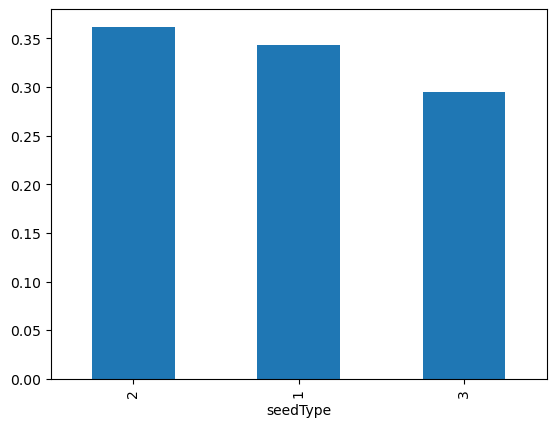

In [18]:
df['seedType'].value_counts(normalize=True).plot.bar()

In [20]:
df.describe()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,105.00000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,102.87619,14.974286,14.596857,0.873644,5.636800,3.278933,3.578116,5.421095,1.952381
std,60.19291,2.988076,1.357379,0.022177,0.466863,0.378172,1.505428,0.511804,0.801212
min,4.00000,10.590000,12.410000,0.809900,4.899000,2.630000,0.765100,4.607000,1.000000
25%,48.00000,12.460000,13.380000,0.862500,5.224000,2.967000,2.270000,5.046000,1.000000
50%,103.00000,14.920000,14.520000,0.877900,5.563000,3.312000,3.600000,5.219000,2.000000
75%,155.00000,17.260000,15.730000,0.888300,6.017000,3.562000,4.677000,5.879000,3.000000
max,208.00000,20.970000,17.250000,0.910800,6.675000,4.032000,8.315000,6.550000,3.000000


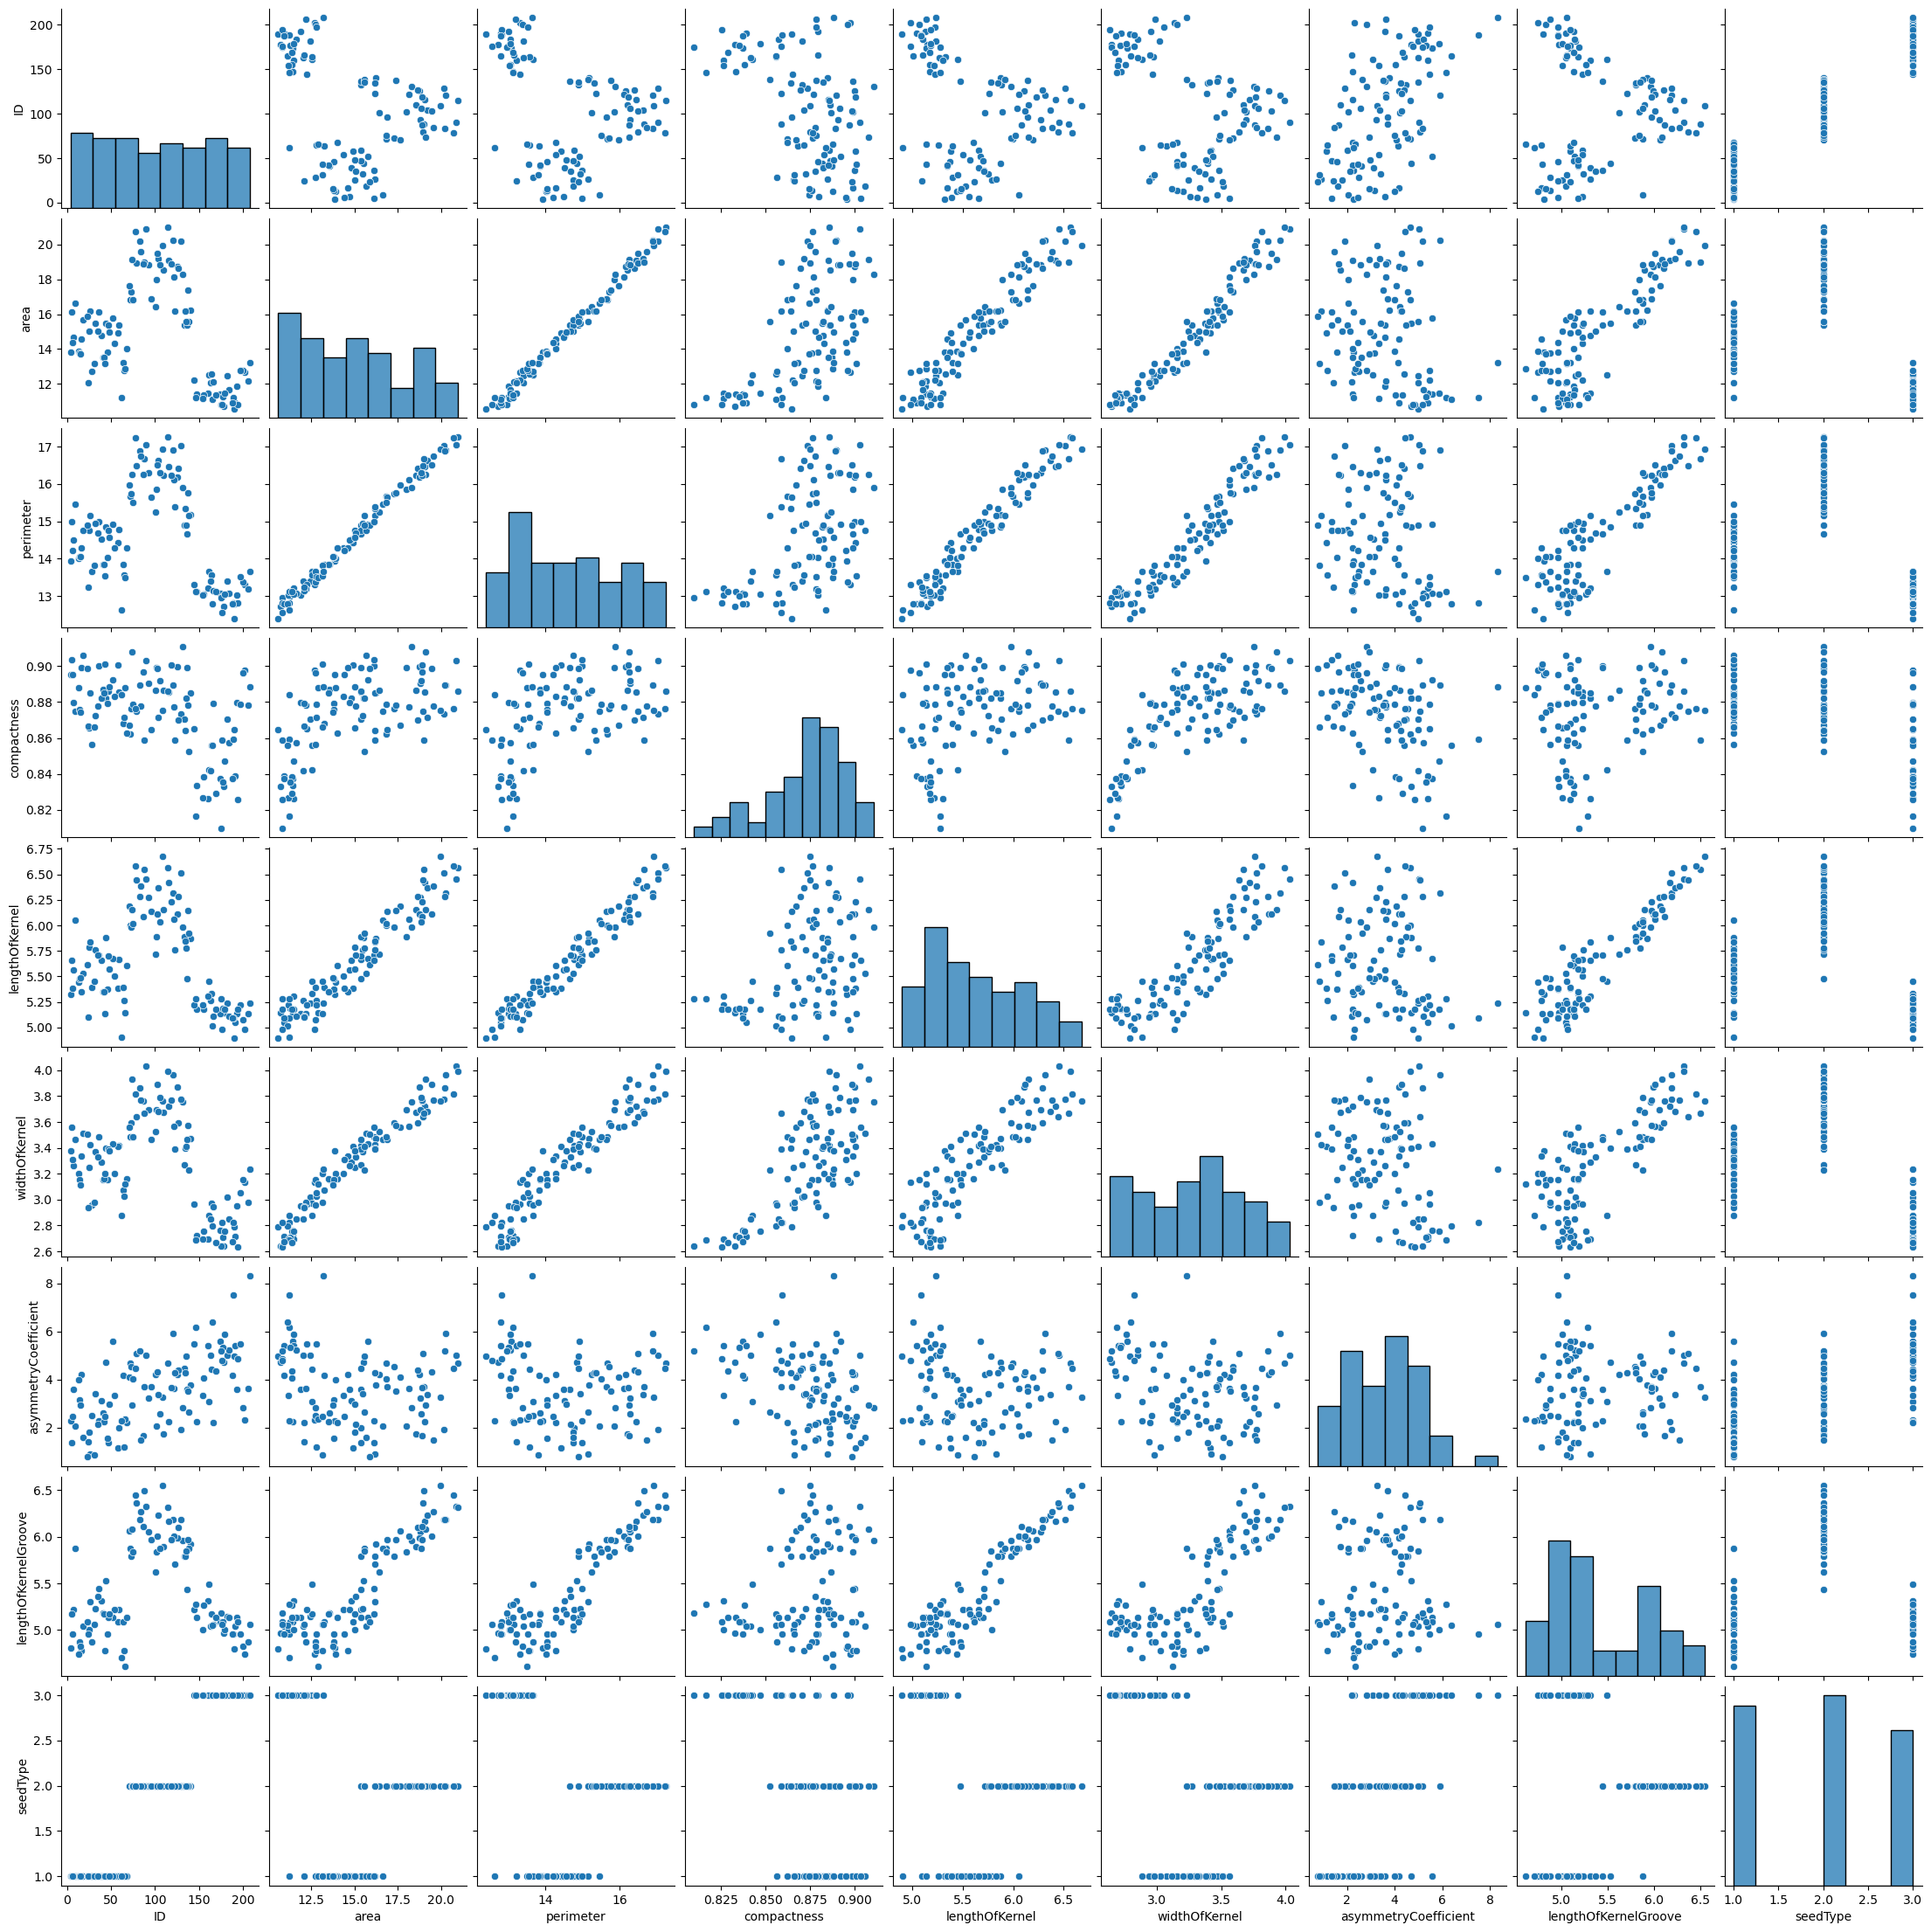

In [22]:
sns.pairplot(df)

# Building predictive algorithm using random forest

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)



In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs=ss.fit_transform(x)

X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(X_trains,y_train)
y_train_pred =rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
#print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

Confusion Matrix - Train: 
 [[22  0  0]
 [ 0 30  0]
 [ 0  0 21]]


Overall Accuracy - Train:  1.0


Confusion Matrix - Test: 
 [[13  1  0]
 [ 0  8  0]
 [ 0  0 10]]


Overall Accuracy - Test:  0.96875


# Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_trains,y_train)

GaussianNB()

In [29]:
y_train_pred = gnb.predict(X_trains)
y_train_prob = gnb.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))


y_test_pred = gnb.predict(X_tests)
y_test_prob = gnb.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

Confusion Matrix - Train: 
 [[22  0  0]
 [ 0 30  0]
 [ 0  0 21]]


Overall Accuracy - Train:  1.0


Confusion Matrix - Test: 
 [[13  1  0]
 [ 0  8  0]
 [ 0  0 10]]


Overall Accuracy - Test:  0.96875


# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

knn=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,20),'p':sp_randint(1,5)}

rsearch_knn=RandomizedSearchCV(knn,param_distributions=params,cv=3,n_iter=50,return_train_score=True,random_state=3,n_jobs=-1)
rsearch_knn.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000224169D7A70>,
                                        'p': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002240BA83140>},
                   random_state=3, return_train_score=True)

In [32]:
rsearch_knn.best_params_

{'n_neighbors': 8, 'p': 3}

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve


knn=KNeighborsClassifier(**rsearch_knn.best_params_)

# done above
knn.fit(X_trains,y_train)
y_train_pred = knn.predict(X_trains)
y_train_prob = knn.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
#print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = knn.predict(X_tests)
y_test_prob = knn.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('Classification Report-Test: \n', classification_report(y_test,y_test_pred))
#print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))


Confusion Matrix - Train: 
 [[22  0  0]
 [ 0 30  0]
 [ 0  0 21]]


Overall Accuracy - Train:  1.0


Confusion Matrix - Test: 
 [[14  0  0]
 [ 0  8  0]
 [ 0  0 10]]


Overall Accuracy - Test:  1.0
Classification Report-Test: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



# Clustering

In [52]:
from sklearn.cluster import KMeans

In [54]:
model = KMeans(n_clusters = 3)

In [56]:
from scipy.stats import zscore
df_scaled=df.apply(zscore)

In [58]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_scaled)
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

,num_clusters,cluster_errors
0,1,945.000000
1,2,495.918846
2,3,245.012198
3,4,207.757033
4,5,177.345276
5,6,154.730217
6,7,138.480097
7,8,122.615191
8,9,110.273851


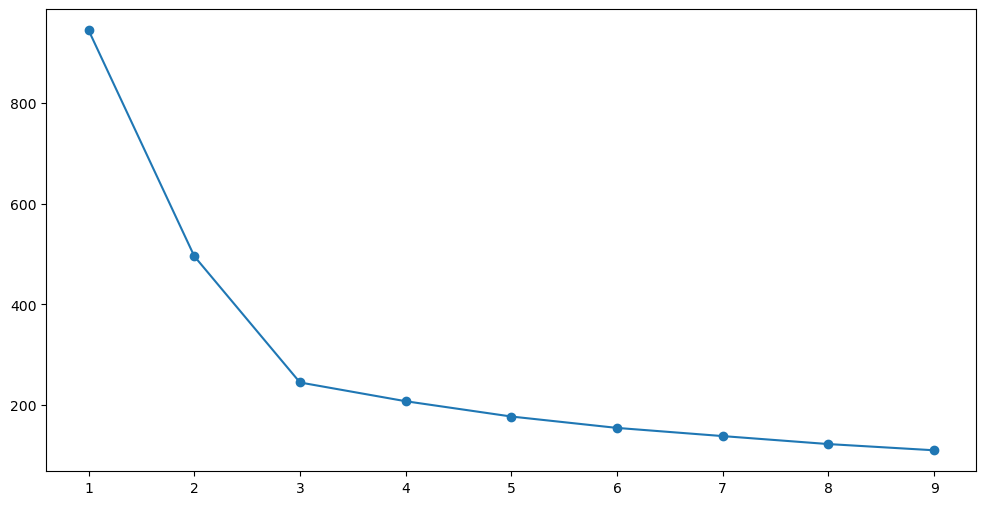

In [60]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [62]:
kmeans=KMeans(n_clusters=3, n_init=15,random_state=3)

In [64]:
kmeans.fit(df_scaled)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=15, random_state=3)

In [66]:
centroids=kmeans.cluster_centers_

In [68]:
pd.DataFrame(centroids,columns=df.columns)

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1.231959,-1.117311,-1.104463,-0.990012,-1.019310,-1.173524,0.771988,-0.683586,1.313813
1,-1.085230,-0.185389,-0.216147,0.467636,-0.285525,-0.035800,-0.720991,-0.653045,-1.160481
2,0.053048,1.121514,1.141507,0.361834,1.139542,1.019023,0.074190,1.225779,0.059719


In [70]:
df_scaled['Class']=kmeans.labels_.astype('object')

In [72]:
df_scaled['Class'].value_counts()

Class
1    37
2    37
0    31
Name: count, dtype: int64

In [74]:
df_k=df_scaled.copy()
df_k.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType,Class
201,1.654667,-0.774859,-0.945190,1.089960,-1.404976,-0.382429,-0.853077,-1.327340,1.313813,0
58,-0.732422,0.136429,0.128169,0.546253,0.054236,0.372155,-1.053979,-0.390872,-1.194376,1
101,-0.014626,1.014090,0.935038,1.157924,0.544945,1.102826,-1.007925,0.816522,0.059719,2
35,-1.116360,0.385268,0.298425,1.194171,0.155391,0.547516,-0.873101,0.043004,-1.194376,1
71,-0.515414,0.627381,0.794391,-0.513976,0.777386,0.544859,0.732114,0.895052,0.059719,2


In [76]:
from mpl_toolkits.mplot3d import Axes3D

In [78]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 800x600 with 0 Axes>

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [81]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [83]:
df_h

NameError: name 'df_h' is not defined

In [85]:
print('K-Means Predicted Data Classes:')
print(df_k['Class'].value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h['label'].value_counts())

K-Means Predicted Data Classes:
Class
1    37
2    37
0    31
Name: count, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:


NameError: name 'df_h' is not defined

In [87]:
sns.pairplot(df_h,hue='label')

NameError: name 'df_h' is not defined

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6283317400251318


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


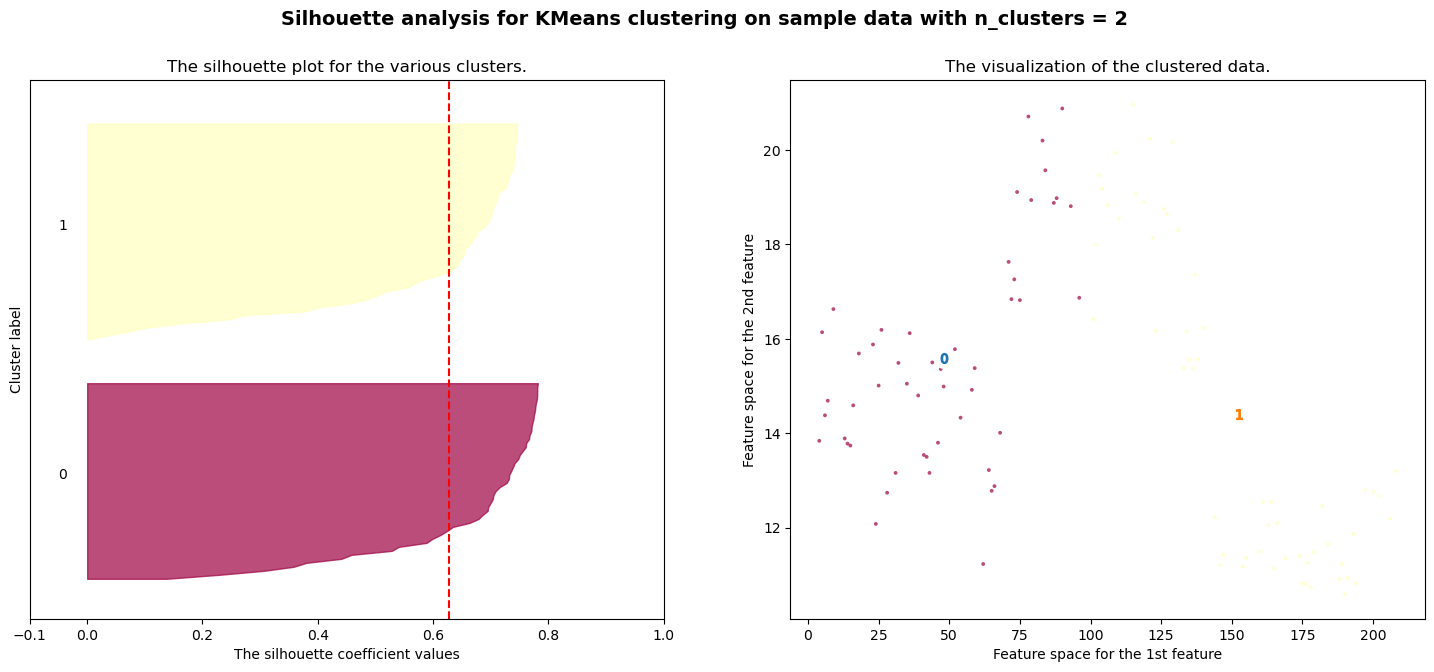

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.559269723352275


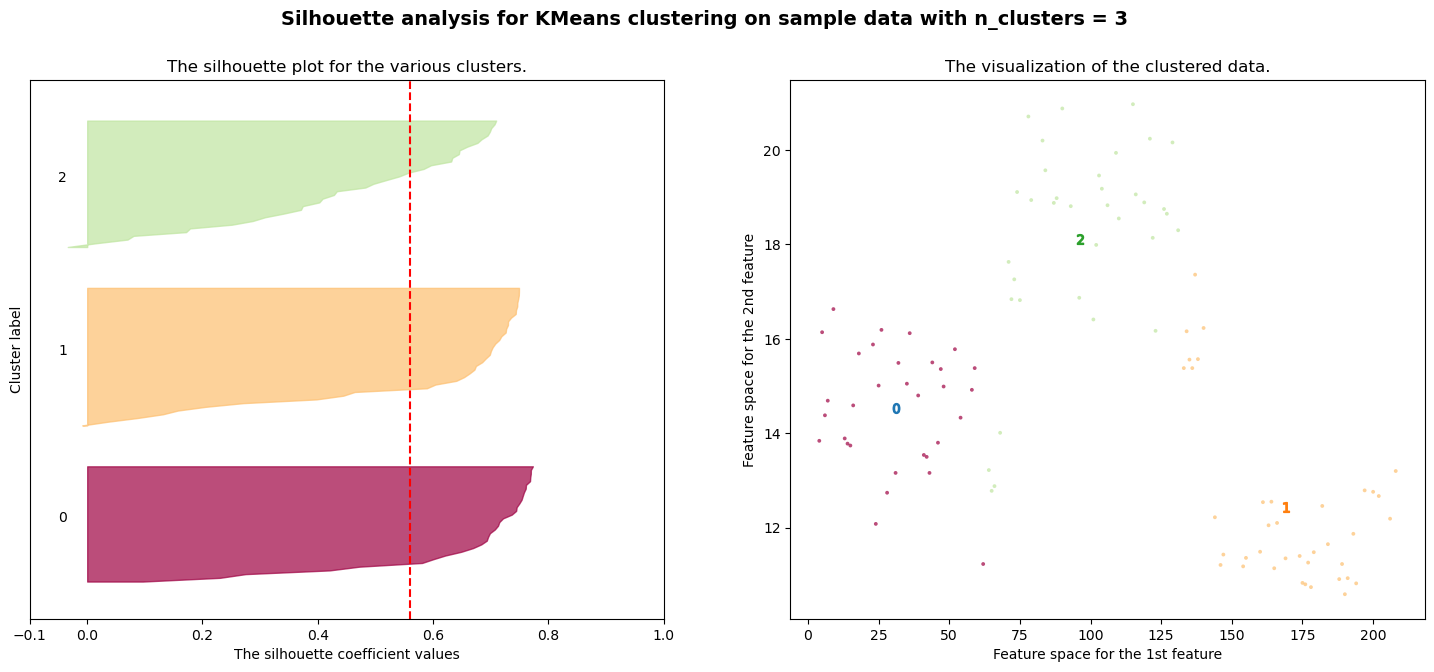

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5856036170558779


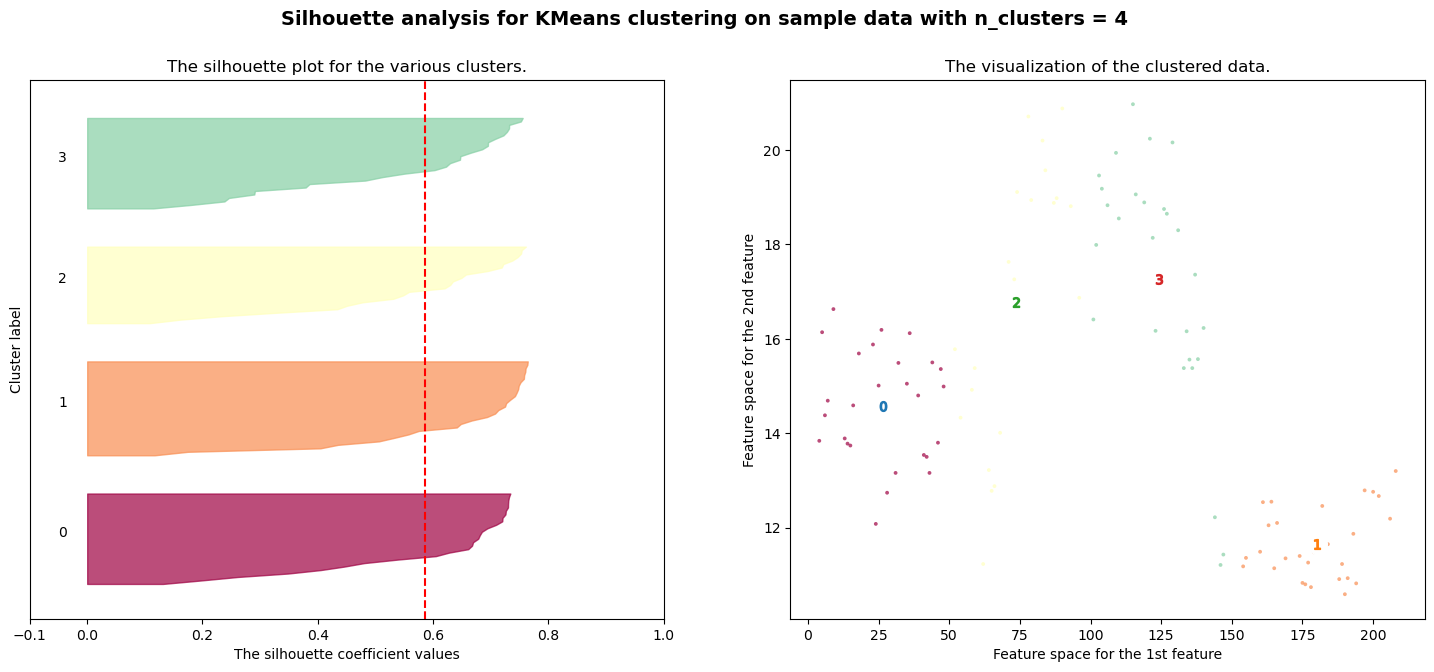

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5394582568286381


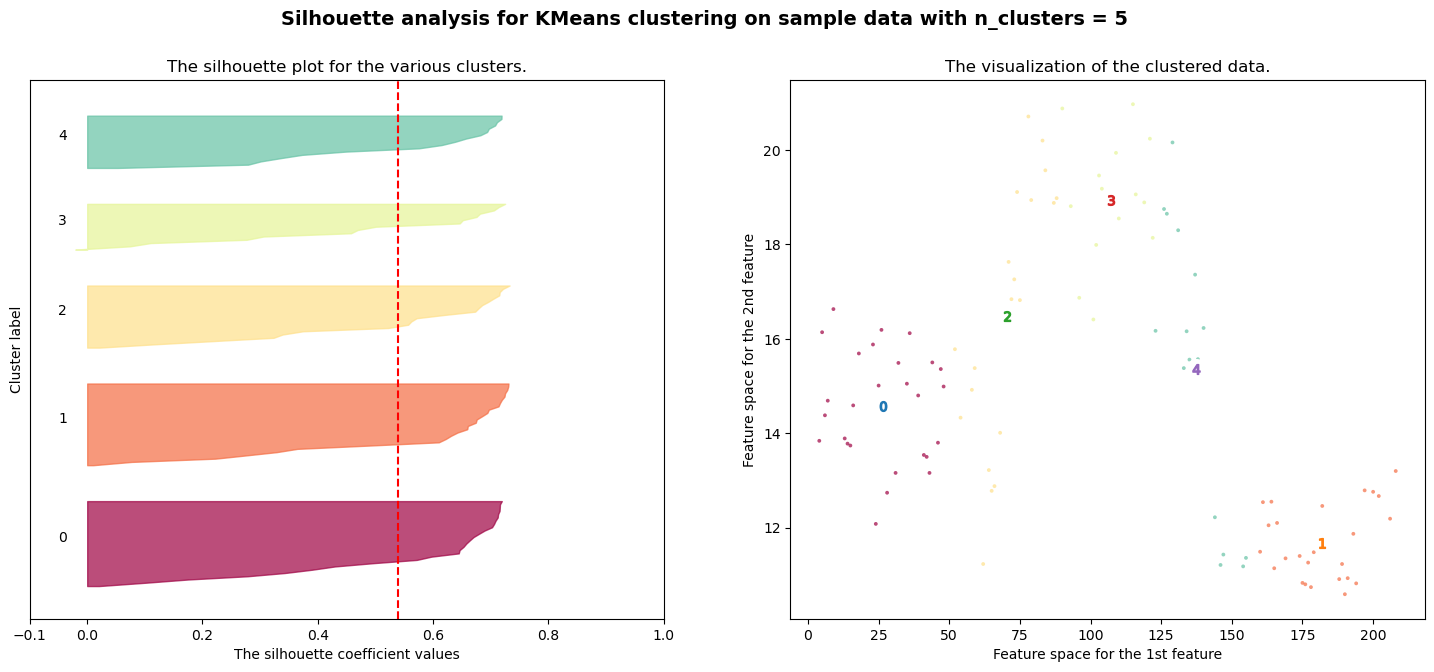

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.5327995435205325


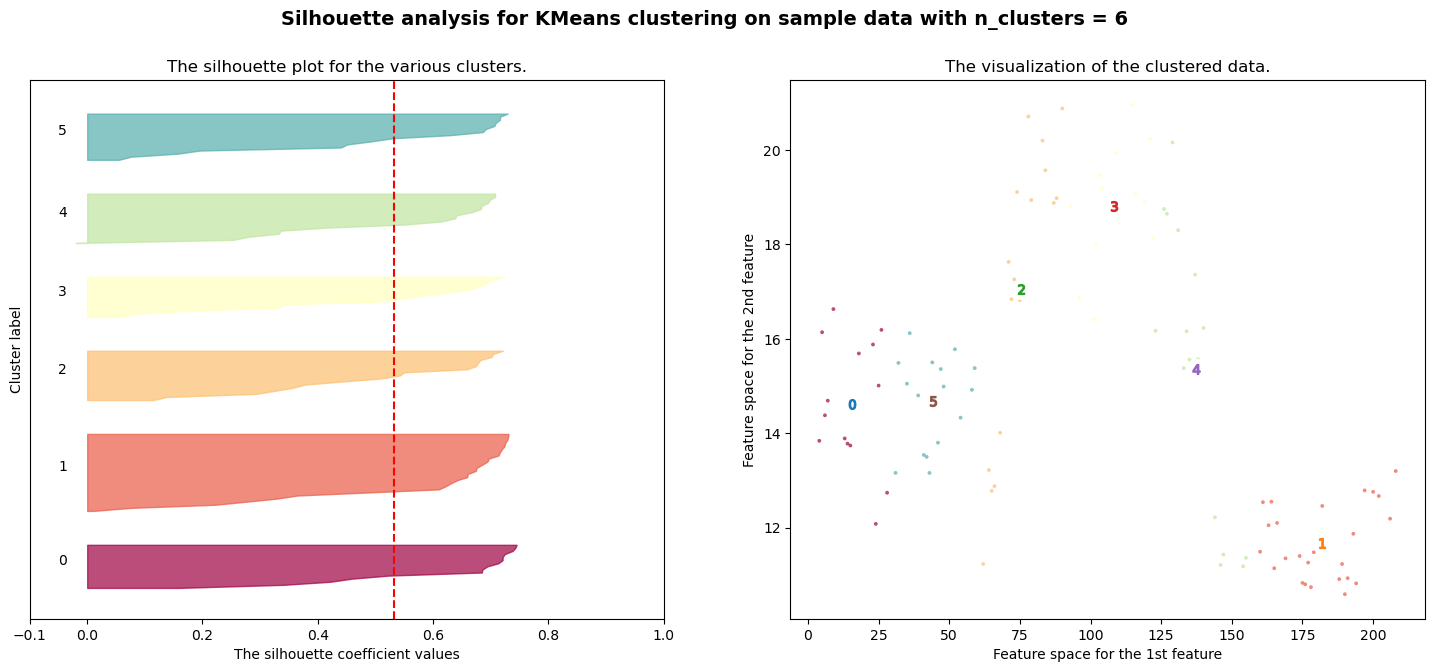

In [91]:
from __future__ import print_function
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=np.array(df.drop('seedType',axis=1))
y=np.array(df['seedType'])

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:,1], marker='.', s=30, lw=0, alpha=0.7,c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()